Question 9: Classification using Flight.csv

Part a: Problem, Data, and Goals

Problem: 

Delta Airlines has experienced a 15% increase in customer dissatisfaction ratings within the last year 
because of their delayed flight times. Stakeholders want to understand how to win over their customers again! They 
requested that the Data Solutions Department takes a deep dive into the data to find out what is causing their 
flights to be delayed and need a solution to prevent it from happening.

Data:
Predicting Delayed Flights. The file FlightDelays.jmp contains information on all commercial flights departing the 
Washington, DC area and arriving at New York during January 2004. For each flight there is information on the 
departure and arrival airports, the distance of the route, the scheduled time and date of the flight, and so on. 
The variable that we are trying to predict is whether or not a flight is delayed. A delay is defined as an arrival 
that is at least 15 minutes later than scheduled.

Goals:
1. Understand What Features effect Flight Time Most Significantly
2. Predict What Flights will be delayed for the purpose of notifying customers about their flight delay sooner

Part b: Pre-processing

Summary:

In [2]:
import pandas as pd

In [4]:
pathname = "/Users/michaelwhitfield/Library/CloudStorage/GoogleDrive-purduemacademics@gmail.com/My Drive/Purdue Senior Year/Summer24/MGMT 473/Data Files/FlightDelays.csv"

flights_df = pd.read_csv(pathname, sep=",")

flights_df


,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime


In [55]:
#Change Column Names to Make More Sense
flights_df.rename(columns={"CRS_DEP_TIME": "Original_Dep_Time", "DEP_TIME": "Actual_Dep_Time", "DISTANCE": 
    "Distance (MI)"} , inplace=True)
flights_df

,Original_Dep_Time,CARRIER,Actual_Dep_Time,DEST,Distance (MI),FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime


In [100]:
#Checking and Converting Data Types
print(type(flights_df["FL_DATE"][0]))
flights_df["FL_DATE"] = pd.to_datetime(flights_df["FL_DATE"])
print(type(flights_df["FL_DATE"][0]))

flights_df['FL_MONTH'] = flights_df['FL_DATE'].dt.month
flights_df['FL_DAY'] = flights_df['FL_DATE'].dt.day


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [70]:
#Examine Carrier Counts
flights_df["CARRIER"].nunique()

8

In [14]:

#Check For NA values
for column in flights_df.columns:
    print(f"'{column}' is missing {sum(flights_df[column].isnull())} values")  

'CRS_DEP_TIME' is missing 0 values
'CARRIER' is missing 0 values
'DEP_TIME' is missing 0 values
'DEST' is missing 0 values
'DISTANCE' is missing 0 values
'FL_DATE' is missing 0 values
'FL_NUM' is missing 0 values
'ORIGIN' is missing 0 values
'Weather' is missing 0 values
'DAY_WEEK' is missing 0 values
'DAY_OF_MONTH' is missing 0 values
'TAIL_NUM' is missing 0 values
'Flight Status' is missing 0 values


In [18]:
#Check Descriptive statistics of dataset
flights_df.describe()


,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


<class 'matplotlib.figure.Figure'>


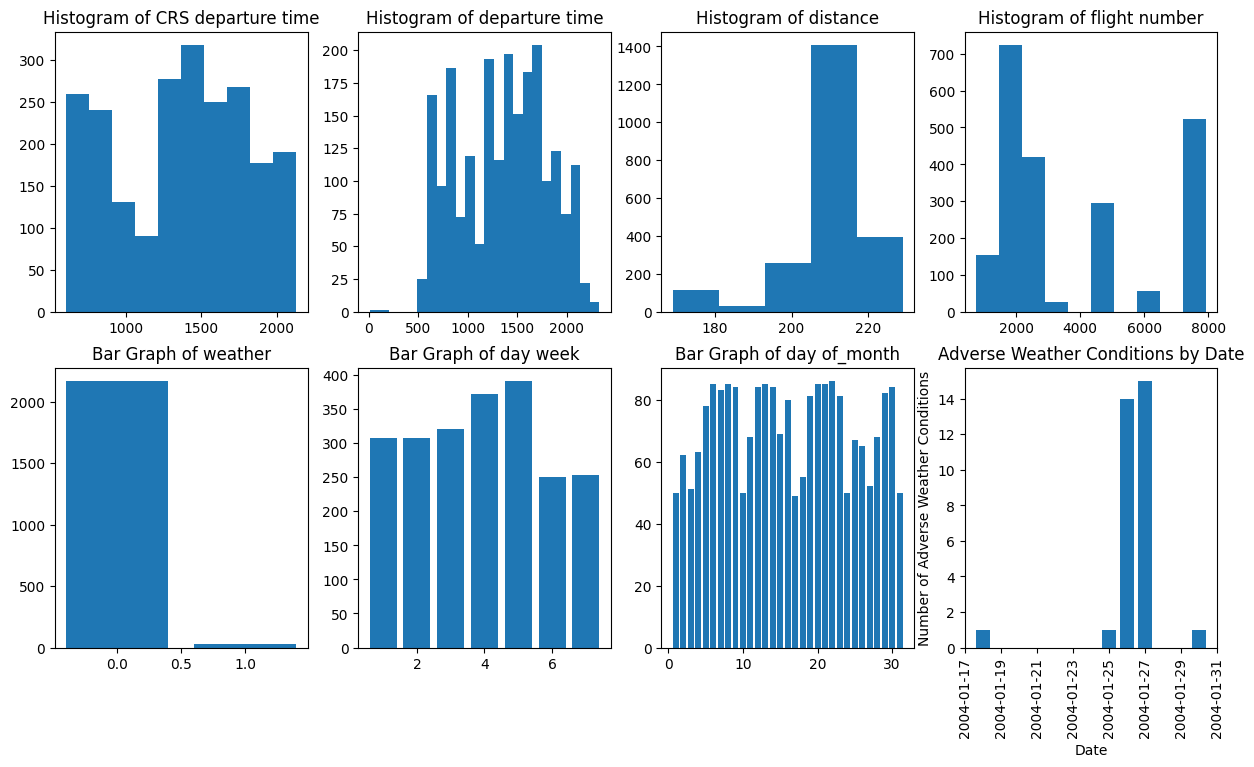

In [67]:
import matplotlib.pyplot as plt

#Create Visuals of features of Interest
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
print(type(fig))

axs[0][0].hist(flights_df["Original_Dep_Time"].values, bins=10)
axs[0][0].set_title('Histogram of CRS departure time')

axs[0][1].hist(flights_df["Actual_Dep_Time"], bins=24)
axs[0][1].set_title('Histogram of departure time')

axs[0][2].hist(flights_df["Distance (MI)"].values, bins=5)
axs[0][2].set_title('Histogram of distance')

axs[0][3].hist(flights_df["FL_NUM"].values)
axs[0][3].set_title('Histogram of flight number')

#Binary Variable (should I use groupby?)
axs[1][0].bar(flights_df["Weather"].value_counts().index, flights_df['Weather'].value_counts().values)
axs[1][0].set_title('Bar Graph of weather')

axs[1][1].bar(flights_df["DAY_WEEK"].value_counts().index, flights_df["DAY_WEEK"].value_counts().values)
axs[1][1].set_title('Bar Graph of day week')

axs[1][2].bar(flights_df['DAY_OF_MONTH'].value_counts().index, flights_df['DAY_OF_MONTH'].value_counts().values)
axs[1][2].set_title('Bar Graph of day of_month')

'''I wanted to investigate if there were particular outlier days that had the majority of bad weather days
    It seems that all adverse weather days in 2004 are all within January'''
bad_weather_by_date = flights_df[flights_df["Weather"] == 1].groupby("FL_DATE").size()
axs[1][3].bar(bad_weather_by_date.index, bad_weather_by_date.values)
axs[1][3].set_title('Adverse Weather Conditions by Date')
axs[1][3].set_xlabel('Date')
axs[1][3].set_ylabel('Number of Adverse Weather Conditions')
plt.xticks(rotation=90)

plt.show()

In [101]:
#One Hot Encoding
one_hot_encode_list = ["CARRIER","ORIGIN", "DAY_WEEK", "DAY_OF_MONTH", "FL_NUM", "TAIL_NUM", "DEST"]
numerical_data_list = flights_df.select_dtypes(include=["int64"]).columns.to_list()

#Adjusting Variables
flights_df["FL_MIN_DELAYED"] = abs(flights_df["Original_Dep_Time"] - flights_df["Actual_Dep_Time"])
numerical_data_list.append("FL_MIN_DELAYED")
numerical_data_list.remove("Original_Dep_Time")
numerical_data_list.remove("Actual_Dep_Time")

numerical_data_list.extend(['FL_YEAR', 'FL_MONTH', 'FL_DAY'])



In [98]:
#Standarizing and Transforming Data
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

one_hot_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

col_transformer = ColumnTransformer(transformers=[
    ("num_p", num_pipeline,numerical_data_list),
    ("ohe_p",one_hot_pipeline, one_hot_encode_list),
    ],
    remainder='passthrough',
    n_jobs=-1)

preprocessing_pipeline= Pipeline(
    steps=[
        ("preprocessing", col_transformer) 
    ])

In [102]:
#Create List for X variables
from sklearn.model_selection import train_test_split, GridSearchCV
X_column = ["FL_MIN_DELAYED","TAIL_NUM","DAY_OF_MONTH","DAY_WEEK","Weather", "ORIGIN", "FL_NUM", "FL_DATE", "Distance "
                                                                                                         "(MI)",   "DEST", "CARRIER" ]

y = flights_df["Flight Status"]

X = flights_df.drop(columns=["Flight Status", "Original_Dep_Time", "Actual_Dep_Time","FL_DATE"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)

X_test_preprocessed = preprocessing_pipeline.transform(X_test)


Part c: Cross Validation Design

CV Design: K-Fold

Why:
Robustness: K-Fold Cross Validation guarantees that every sample in the dataset can appear in both the training and the test sets, giving it a more robust evaluation of performance.

Variance Reduction: K-Fold Cross Validation becomes valuable because it averages the results over many folds and, consequently, reduces the variance of the performance metric. It is meaningful for small datasets where the model may be sensitive to particular training/test splits.

Bias-Variance Tradeoff: K-Fold Cross Validation gives a nice balance between both the bias and variances of the model just by making sure that the model is neither overfit nor underfit.

Part d: Evaluation of different classification Models

K-NN

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_preprocessed, y_train)

KNeighborsClassifier(n_neighbors=3)

In [105]:
knn.score(X_test_preprocessed,y_test)

0.8684807256235828

Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train_preprocessed,y_train)

GaussianNB()

In [107]:
naive_model.score(X_test_preprocessed,y_test)

0.46485260770975056

Classification Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()


In [111]:
dtc.fit(X_train_preprocessed,y_train)
y_pred = dtc.predict(X_test_preprocessed)

In [114]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n     delayed       0.72      0.69      0.71        88\n      ontime       0.92      0.93      0.93       353\n\n    accuracy                           0.88       441\n   macro avg       0.82      0.81      0.82       441\nweighted avg       0.88      0.88      0.88       441\n'

Logistic Regression

Part e: Choosing the Candidate Model

Preferred Statistic Measure: Overall Accuracy

Why:
This is one of the possible measures for this task, providing a simple indication of the share of 
correct instances classified. The selected measure is apt since the class distribution seems not very imbalanced.

Candidate Model: KNN

Why: 
K-Nearest Neighbors because of it superior accuracy: It was 86.8% accurate while the Naive Bayes model returned 46.5%
 and the classification tree was overall 82%. KNN's performance is more consistent across different data distributions. Suitability of the Data: At the level of features and task nature of flight status prediction, KNN's approach regarding the consideration of the closest neighbors works just great in capturing the underlying patterns.

Extras
